# DMML-HW-06

<strong>Honlap:</strong>
<a href="https://apagyidavid.web.elte.hu/2025-2026-1/dmml"
target="_blank">apagyidavid.web.elte.hu/2025-2026-1/dmml</a>

<a target="_blank" href="https://colab.research.google.com/github/dapagyi/dmml-web/blob/gh-pages/notebooks/dmml-hw-06.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modellek összehasonlítása

> **Tanulási cél**
>
> A feladat elsődleges célja az, hogy egyfajta tech demoként
> kipróbáljunk minél többféle eszközt, illetve csomagot, amelyek később
> hasznosak lehetnek, valamint legyen egy stabil képünk arról, hogy
> hogyan lehet mérni és összehasonlítani különböző modellek
> teljesítményét.
>
> A másodlagos cél az, hogy törekedjünk a kódunk minél jobb
> szervezésére, hogy ne kelljen sokat ismételgetni, illetve kínlódni a
> kód újrahasznosításával.
>
> Nem cél, hogy jó eredményt érjünk el, de persze lehet rá törekedni.
> Nem kell érteni, hogy miről szól az adathalmaz, amivel dolgozunk. Nem
> kell EDA-t végezni sem.

Keress az interneten egy tetszőleges nyilvános (bináris vagy multi
label) klasszifikációs adathalmazt –
<a href="https://scikit-learn.org/stable/datasets.html"
target="_blank">például innen is választhatsz, illetve generálhatsz
egyet magadnak</a> –, amelyen nem vagy alig kell csak előfeldolgozást
végezni, és lehetőleg nem túl kicsi.

Válassz le egy teszt adathalmazt, pl. az adatok 20%-t (<a
href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"
target="_blank"><code>train_test_split</code></a>).

A maradékon taníts be három különböző modellt:

-   Az egyik legyen egy decision tree vagy egy random forest.
-   A másik kettő legyen egy-egy boosting modell, de ne a
    `scikit-learn`-ből. (Ld. az órai Notebookban szereplő
    hivatkozásokat.)

Validáláshoz legalább egy (de akár az összes) esetben végezz
keresztvalidációt. (A másik, egyszerűbb módszer az lenne, hogy a tanító
adathalmazt is felosztod egy tanító és egy validációs halmazra (ugyanúgy
`train_test_split`-tel), és a validációs halmazon méred a modelltanítási
kísérletek eredményét.)

A hiperparaméter-optimalizáláshoz ~~legalább egy esetben~~
*opcionálisan* (frissítve: október 9.) próbáld ki az előző óra végén
említett
<a href="https://optuna.readthedocs.io/en/stable/tutorial/index.html"
target="_blank">Optuna csomagot</a>.

> **Megjegyzés**
>
> A keresztvalidációt és a hiperparaméter-optimalizálás kapcsán fontos
> tisztázni egy részletet, ami felett gyakran szokás átsiklani, pedig
> bizonyos esetekben problémákhoz vezethet (konkrétan data leakage-hez,
> vagy legalábbis túlzottan optimista becsléshez a modell teljesítményét
> illetően).
>
> Amikor pl. $k$-foldot használunk a hiperparaméter-optimalizálás során,
> akkor annak a foldjai nem feltétlenül használhatóak közvetlenül a
> modell teljesítményének mérésére, ezért érdemes lehet egy külső
> $k$-foldot is használni, amelynek a foldjain mérjük a modell
> teljesítményét.
>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py"
>     target="_blank">Example (<code>scikit-learn</code>): Nested versus
>     non-nested cross-validation</a>
>
> Ez *opcionális*, de akinek jól mentek a korábbi dolgok, annak
> mindenképpen érdemes a fenti linket legalább elolvasnia, és
> felhasználni a feladat megoldásához is.

Az, hogy milyen metrika mentén optimalizálsz, rád van bízva, de a modell
kiértékeléséhez tüntess fel minél többféle metrikát is (pl. accuracy,
precision, recall, F1-score, ROC AUC stb.), valamint ábrázolj
modellenként egy-egy confusion matrixot és ROC görbét is a teszt
adathalmazon kiértékelve a modellt.

> **Megjegyzés**
>
> A több metrika szerinti kiértékelés könnyen megvalósítható például az
> alábbi módon:
>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html"
>     target="_blank">Example (<code>scikit-learn</code>): Demonstration of
>     multi-metric evaluation on <code>cross_val_score</code> and
>     <code>GridSearchCV</code></a>

A megoldásod végén gyűjtsd össze egy DateFrame-ben vagy akár csak
printeld ki összesítve a három modell (hiperparaméter-optimalizálás
utáni) teljesítményét:

-   A tanító teljesítmény többféle metrika mentén.
    -   Ha keresztvalidációt használsz az adott modell kiértékelésére,
        akkor a foldokon mért teljesítmények átlaga és szórása. Ha
        hold-out validációt használsz, akkor csak egyetlen szám
        (metrikánként).
-   A validációs teljesítmény többféle metrika mentén.
    -   Ha keresztvalidációt használsz az adott modell kiértékelésére,
        akkor a foldokon mért teljesítmények átlaga és szórása.
    -   Ez írja le legjobban a modellünk teljesítményét.
-   A teszt adathalmazon mért teljesítmény többféle metrika mentén.
    -   Ez teljesen különálló halmazon történik, és csak a végén nézzük
        meg.
    -   Csak egyetlen szám (metrikánként), nem annyira robosztus, mint
        pl. egy keresztvalidációs mért teljesítmény.
    -   Ez egyrészt egy végső sanity check, hogy hasonló eredményt
        kapunk-e, mint a validációkor, másrészt azt szimulálja, mintha
        pl. Kaggle-ön csak egy végső score-t hajkurásznánk.
    -   Ábrázold a confusion matrixot és a ROC görbét is.

## Kódstruktúra

Ez egy elég általános tanács, de ahhoz, hogy ne kelljen sokat
ismételgetni, copy-paste-elni a kódokat, próbáld meg az egyes lépéseket
egy-egy függvénybe szervezni, és a függvényeket meghívni. Használj
loopokat, és pl. csak iterálj végig a modelleken, mindegyikre meghívva
ugyanazokat a függvényeket, stb.

(Ld. még: szoftverfejlesztők összes bullshit akronimja, pl.:
<a href="https://en.wikipedia.org/wiki/Don%27t_repeat_yourself"
target="_blank">DRY</a>,
<a href="https://en.wikipedia.org/wiki/KISS_principle"
target="_blank">KISS</a>,
<a href="https://en.wikipedia.org/wiki/You_aren%27t_gonna_need_it"
target="_blank">YAGNI</a> stb.)

> **Egy specifikusabb tanács**
>
> Gyakran egy adaton ugyanazon változásokat hajtjuk végre, ezeket egy
> jól kezelhető egységbe zárhatjuk a `scikit-learn` pipeline modulja
> segítségével. Ez nemcsak az adatelőkészítést teszi könnyebbé, hanem a
> modelltanítást, hiperparaméter-optimalizálást is.
>
> -   <a
>     href="https://scikit-learn.org/stable/modules/compose.html#combining-estimators"
>     target="_blank">User Guide (<code>scikit-learn</code>): Pipelines and
>     composite estimators</a>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/compose/index.html"
>     target="_blank">Examples (˙scikit-learn`): Pipelines and composite
>     estimators</a>
>
> Hasznos eszköz, érdemes használni, én személyesen nagyon szeretem.
>
> Akinek az alapok megvannak, az mindenképpen próbálja ki, de ez
> *opcionális* része a feladatnak.

Végül egy gyakorlatiasabb tanács: Kaggle-ön gyakran meg lehet nézni a
versenyek győzteseinek a megoldásait. Ezek nagyon sokszor abból állnak,
hogy spamelik a modelleket, és a sok modellből állítanak elő egy
ensemble modellt. Ilyen példákból is sokszor el lehet lesni ötleteket,
hogy mások hogyan struktúrálják a kódjukat.

> **Kiegészítő olvasmányok**
>
> Az alábbi néhány példa arról szól, hogy hogyan lehet még “fejleszteni”
> a ROC görbe ábrázolásán pl. az egyes foldok eredményeinek
> feltüntetésével, illetve multi label klasszifikáció esetén milyen
> hasonló dolgot lehet csinálni:
>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html"
>     target="_blank">Receiver Operating Characteristic (ROC) with cross
>     validation</a>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html"
>     target="_blank">Multiclass Receiver Operating Characteristic (ROC)</a>
>
> *Opcionális* része a feladatnak az első reprodukálása a házi
> feladatban elkészített modellek valamelyikével. (Az alapfeladatban a
> teszt adathalmazon csak egy ROC görbe van, a validációson lehet azt
> megcsinálni, mint az első linken.)
>
> Ez már egyáltalán nem része opcionálisan sem a feladatnak, de akit
> érdekel, annak érdemes lehet megnézni a következő példát, hogy hogyan
> lehet statisztikai alapon (kétféle megközelítéssel) összehasonlítani
> két modell teljesítményét:
>
> -   <a
>     href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html"
>     target="_blank">Statistical comparison of models using grid search</a>

> **Útmutatás**
>
> Én példaképpen az alábbi egyetemista szellemiségű adathalmazt
> választottam:
>
> -   <a
>     href="https://www.kaggle.com/datasets/fatemehmehrparvar/liver-disorders/data"
>     target="_blank">Liver Disorders: Liver Cirrhosis and Healthy Liver
>     Prediction</a>
>
> Ehhez először megnéztem a feladat elején lévő scikit-learnös linket,
> majd rájöttem, hogy amit szerettem volna adathalmaz (Housing Dataset),
> az regressziós feladat, és a házit klasszifikációs problémaként írtam
> ki. Hát nem segítettem ki magamat.
>
> Google-ön kerestem tovább (“common datasets for classification”
> kulcsszóval), megnéztem néhány ismerős Kaggle linket, összesítő GitHub
> repót, stb. Végül megtaláltam a fenti adathalmazt, ami:
>
> -   aránylag egyszerű,
> -   nem túl nagy (kb. 600 sor),
> -   főként numerikus feature-öket tartalmaz,
> -   bináris klasszifikációs feladatról szól.
>
> Ránéztem néhány Kaggle-ös notebookra is, hogy mire számíthatok, és kb.
> okénak tűnt.
>
> A célnak most megfelel.
>
> EDA nem része a feladatnak, de minimálisan azért megnézem, hogy mivel
> lehet szükséges foglalkoznom. Most `polars`-t fogok használni, mert
> annyira nem vagyok járatos benne, és szeretném próbálgatni,
> `pandas`-hoz azonban több elérhető online anyag van, így talán az
> kezdőbarátabb.
>
> ``` python
> import polars as pl
>
> df = pl.read_csv("../data/liver_disorders.csv")
> print(f"Shape: {df.shape}")
>
> print(f"Duplicates: {df.is_duplicated().sum()}")
> df = df.unique()
> print(f"Shape (after removing duplicates): {df.shape}")
> ```
>
>     Shape: (583, 11)
>     Duplicates: 26
>     Shape (after removing duplicates): (570, 11)
>
> Volt pár duplikátum, amiket töröltem. Ezeknél valószínűbbnek tűnt az,
> hogy valami hibából kerültek be, mintsem hogy bármi különösebb
> jelentőségük lenne, pl. hogy pont ugyanolyan paraméterekkel rendelkező
> emberek volnának. (De nem olvastam utána – Kaggle-ön a Discussion
> oldalon gyakran találni ilyen infókat.)
>
> Ennél többet már nem csinálok az adattal, nehogy esetleg valami data
> leakage-et okozzak. Még megnézek valamit, de már nem módosítok az
> adaton globálisan; máris leválasztom a teszt halmazt – ráadásul úgy,
> hogy biztosan hasonló arányban legyenek a címkék a train és a test
> halmazban is (`stratify` paraméter).
>
> ``` python
> from sklearn.model_selection import train_test_split
>
> train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Selector"])
>
> print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
> print(train_df["Selector"].value_counts())
> print(test_df["Selector"].value_counts())
> ```
>
>     Train shape: (456, 11), Test shape: (114, 11)
>     shape: (2, 2)
>     ┌──────────┬───────┐
>     │ Selector ┆ count │
>     │ ---      ┆ ---   │
>     │ i64      ┆ u32   │
>     ╞══════════╪═══════╡
>     │ 2        ┆ 131   │
>     │ 1        ┆ 325   │
>     └──────────┴───────┘
>     shape: (2, 2)
>     ┌──────────┬───────┐
>     │ Selector ┆ count │
>     │ ---      ┆ ---   │
>     │ i64      ┆ u32   │
>     ╞══════════╪═══════╡
>     │ 2        ┆ 33    │
>     │ 1        ┆ 81    │
>     └──────────┴───────┘
>
> Hiányzó értékek vannak esetleg?
>
> ``` python
> print(df.null_count())
>
> df.filter(pl.any_horizontal(pl.all().is_null()))
> ```
>
>     shape: (1, 11)
>     ┌─────┬────────┬─────┬─────┬───┬─────┬─────┬───────────┬──────────┐
>     │ Age ┆ Gender ┆ TB  ┆ DB  ┆ … ┆ TP  ┆ ALB ┆ A/G Ratio ┆ Selector │
>     │ --- ┆ ---    ┆ --- ┆ --- ┆   ┆ --- ┆ --- ┆ ---       ┆ ---      │
>     │ u32 ┆ u32    ┆ u32 ┆ u32 ┆   ┆ u32 ┆ u32 ┆ u32       ┆ u32      │
>     ╞═════╪════════╪═════╪═════╪═══╪═════╪═════╪═══════════╪══════════╡
>     │ 0   ┆ 0      ┆ 0   ┆ 0   ┆ … ┆ 0   ┆ 0   ┆ 4         ┆ 0        │
>     └─────┴────────┴─────┴─────┴───┴─────┴─────┴───────────┴──────────┘
>
> <div><style>
> .dataframe > thead > tr,
> .dataframe > tbody > tr {
>   text-align: right;
>   white-space: pre-wrap;
> }
> </style>
> <small>shape: (4, 11)</small>
>
> | Age | Gender   | TB  | DB  | Alkphos | Sgpt | Sgot | TP  | ALB | A/G Ratio | Selector |
> |-----|----------|-----|-----|---------|------|------|-----|-----|-----------|----------|
> | i64 | str      | f64 | f64 | i64     | i64  | i64  | f64 | f64 | f64       | i64      |
> | 51  | "Male"   | 0.8 | 0.2 | 230     | 24   | 46   | 6.5 | 3.1 | null      | 1        |
> | 35  | "Female" | 0.6 | 0.2 | 180     | 12   | 15   | 5.2 | 2.7 | null      | 2        |
> | 45  | "Female" | 0.9 | 0.3 | 189     | 23   | 33   | 6.6 | 3.9 | null      | 1        |
> | 27  | "Male"   | 1.3 | 0.6 | 106     | 25   | 54   | 8.5 | 4.8 | null      | 2        |
>
> </div>
>
> Négy hiányzó érték nem túl jelentős szerencsére. Az “A/G Ratio” egy
> vérvizsgálati eredmény. Egyelőre nem tudok róla sokat, de megnézem,
> hogy milyen értékeket vesz fel másoknál.
>
> ``` python
> import seaborn as sns
>
> sns.histplot(df, x="A/G Ratio", hue="Selector", palette="colorblind", kde=True)
> ```
>
> 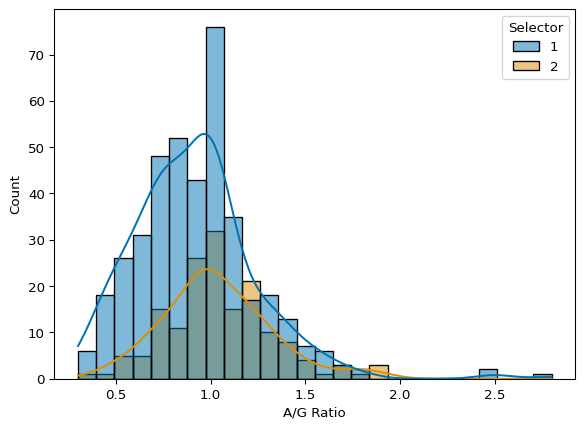
>
> Ezt a négy hiányzó értéket kitöltöm majd a feature mediánjával.
>
> Mi a helyzet a többi feature eloszlásával?
>
> ``` python
> import matplotlib.pyplot as plt
>
>
> sns.pairplot(df.to_pandas(), hue="Selector", corner=True, palette="colorblind")
> plt.suptitle("Numerical Features", y=1.02)
> plt.show()
> ```
>
> 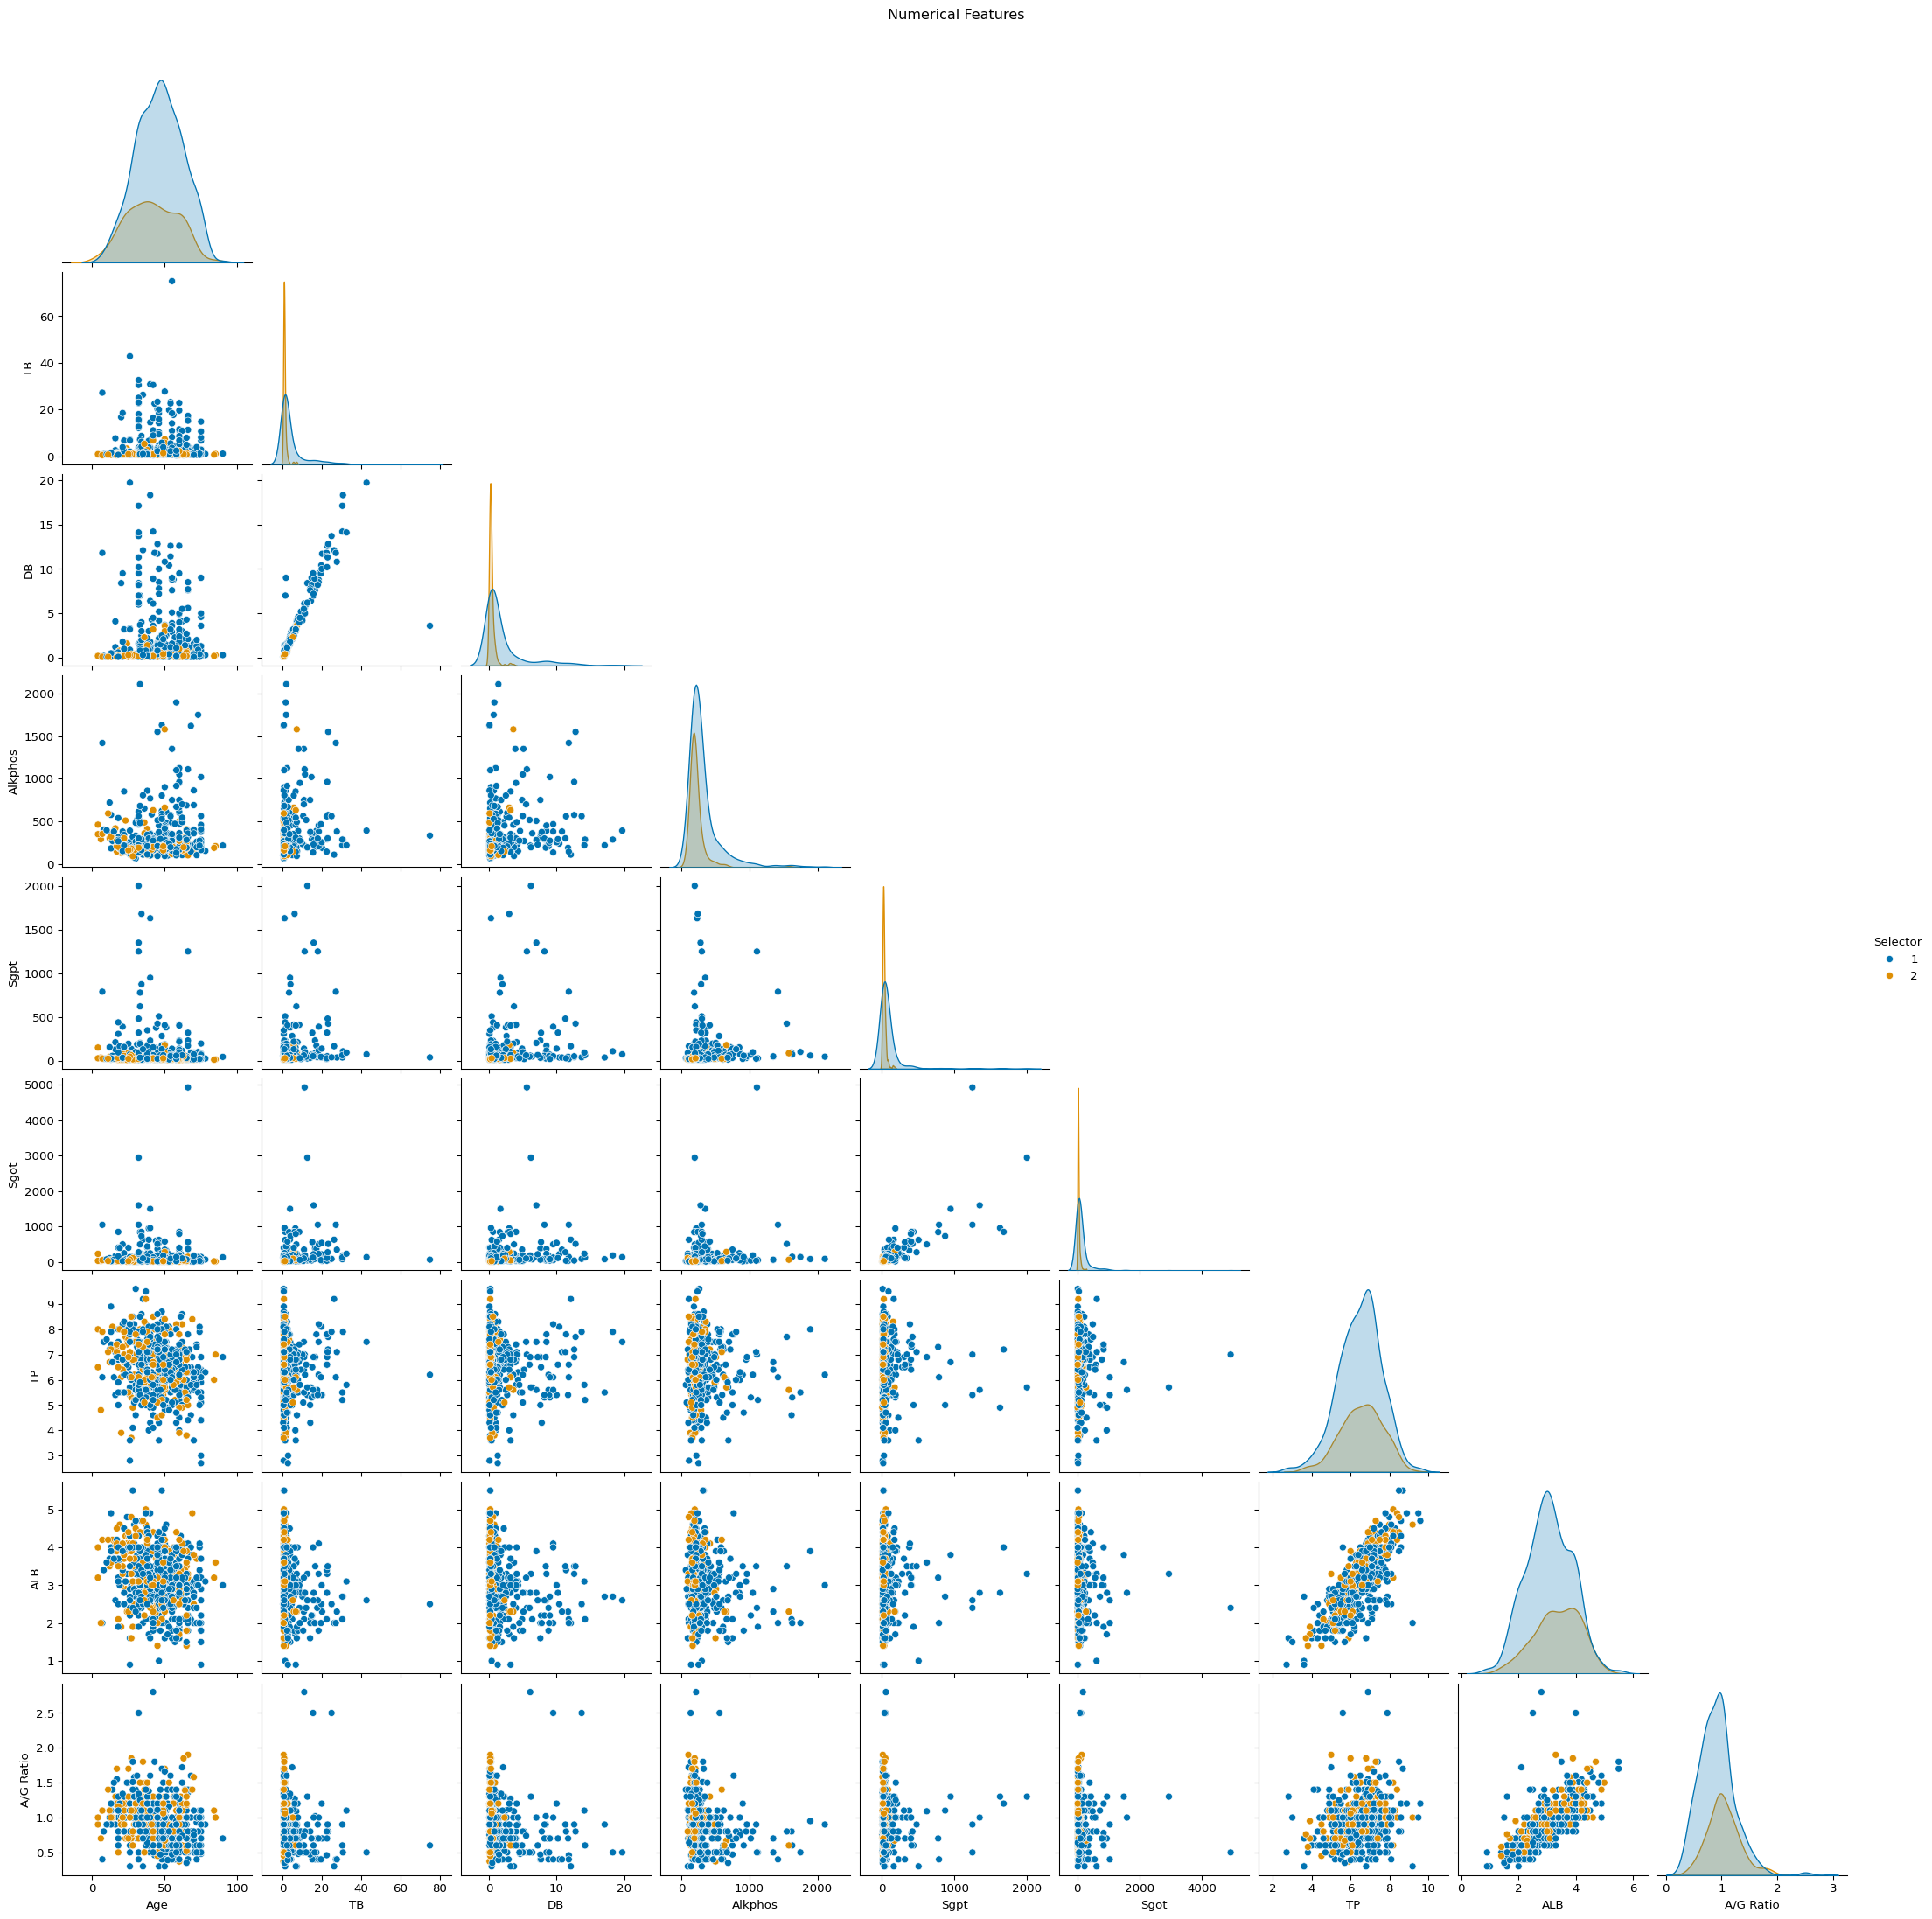
>
> Néhány oszlop eloszlásának elég hosszú a farka, ezeknek más esetben
> érdemes lehetne a logaritmusát venni, hogy kezelhetőbbé váljanak, de a
> fa alapú modellek erre nem érzékenyek. (*Gondoljuk meg, hogy ez mit
> jelenthet, illetve hogy miért lehet ez.*)
>
> A fentiek után elkezdtem összerakni a kódot apránként egy külön
> fájlban. Közel sincs kész, de aránylag könnyen folytatható. Amikor már
> elég sok modellből áll a megoldás, biztos refaktorálnám még, hogy
> kevesebb legyen a kódismétlés, mert jelenleg elég sok boilerplate van.
>
> ``` python
> import optuna
> import polars as pl
> import scipy
> from sklearn.base import BaseEstimator
> from sklearn.compose import ColumnTransformer
> from sklearn.ensemble import RandomForestClassifier
> from sklearn.impute import SimpleImputer
> from sklearn.metrics import classification_report, f1_score, roc_auc_score
> from sklearn.model_selection import (
>     RandomizedSearchCV,
>     StratifiedKFold,
>     cross_val_score,
>     cross_validate,
>     train_test_split,
> )
> from sklearn.pipeline import Pipeline
> from sklearn.preprocessing import OneHotEncoder
>
>
> def create_pipeline_from_classifier(clf: BaseEstimator) -> Pipeline:
>     pipeline = Pipeline(
>         steps=[
>             (
>                 "preprocessor",
>                 ColumnTransformer(
>                     transformers=[
>                         ("ag_ratio", SimpleImputer(strategy="median"), ["A/G Ratio"]),
>                         ("gender", OneHotEncoder(handle_unknown="ignore", drop="first"), ["Gender"]),
>                     ],
>                     remainder="passthrough",
>                     verbose_feature_names_out=False,
>                 ),
>             ),
>             ("model", clf),
>         ]
>     )
>
>     return pipeline
>
>
> def validate_model(
>     model: BaseEstimator,
>     X_train: pl.DataFrame,
>     y_train: pl.Series,
>     cv_number_of_splits: int,
>     random_state: int,
> ) -> dict:
>     cv: StratifiedKFold = StratifiedKFold(n_splits=cv_number_of_splits, shuffle=True, random_state=random_state)
>     scores = cross_validate(
>         model,
>         X_train,  # type: ignore
>         y_train,
>         cv=cv,
>         scoring=["roc_auc", "accuracy"],
>         return_train_score=True,
>         verbose=0,
>     )
>     print(f"Cross-validated ROC-AUC score: {scores['test_roc_auc'].mean():.4f} ± {scores['test_roc_auc'].std():.4f}")
>     return scores
>
>
> def evaluate_model_on_test(model: BaseEstimator, X: pl.DataFrame, y_true: pl.Series) -> dict:
>     scores = {
>         "roc_auc": roc_auc_score(y_true, model.predict_proba(X)[:, 1]),  # type: ignore
>         "accuracy": (y_true == model.predict(X)).mean(),  # type: ignore
>         "f1": f1_score(y_true, model.predict(X)),  # type: ignore
>     }
>
>     print("Test ROC-AUC:", scores["roc_auc"])
>     # print("Test Accuracy:", scores["accuracy"])
>     # print("Test F1 Score:", scores["f1"])
>     print(classification_report(y_true, model.predict(X)))  # type: ignore
>
>     return scores
>
>
> def main() -> None:
>     RANDOM_STATE = 42
>     CV_FOLDS = 5
>
>     df = pl.read_csv("./data/liver_disorders.csv")
>     df = df.unique()
>
>     X, y = df.drop("Selector"), df["Selector"]
>     X_train, X_test, y_train, y_test = train_test_split(
>         X.to_pandas(), y.to_pandas(), test_size=0.4, random_state=RANDOM_STATE, stratify=y
>     )
>     print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")
>
>     # Unoptimized model for baseline
>     clf = RandomForestClassifier(random_state=RANDOM_STATE)
>     pipeline = create_pipeline_from_classifier(clf)
>
>     _cv_scores = validate_model(pipeline, X_train, y_train, CV_FOLDS, RANDOM_STATE)
>     pipeline.fit(X_train, y_train)
>     _test_scores = evaluate_model_on_test(pipeline, X_test, y_test)
>
>     # Hyperparameter tuning using RandomizedSearchCV
>     clf = RandomForestClassifier(random_state=RANDOM_STATE)
>     param_grid = {
>         "model__criterion": ["gini", "entropy"],
>         "model__max_depth": [None, 5, 10, 15, 20],
>         "model__n_estimators": scipy.stats.randint(100, 500),
>         "model__min_samples_split": [2, 5, 10],
>         "model__min_samples_leaf": [1, 2, 4],
>     }
>
>     randomized_search_cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE + 1)
>     randomized_search = RandomizedSearchCV(
>         create_pipeline_from_classifier(clf),
>         param_grid,
>         n_iter=25,
>         cv=randomized_search_cv,
>         scoring="roc_auc",
>         verbose=1,
>         n_jobs=-1,
>     )
>     randomized_search.fit(X_train, y_train)
>     cv_df = pl.DataFrame(randomized_search.cv_results_).sort("rank_test_score")
>     print(
>         f"Randomized search CV - Cross-validated ROC-AUC score: {cv_df['mean_test_score'][0]:.4f} ± {cv_df['std_test_score'][0]:.4f}"
>     )
>     _cv_scores = validate_model(randomized_search.best_estimator_, X_train, y_train, CV_FOLDS, RANDOM_STATE)
>     print(randomized_search.best_params_)
>     _test_scores = evaluate_model_on_test(randomized_search.best_estimator_, X_test, y_test)
>
>     # Hyperparameter tuning using Optuna
>     def objective(trial: optuna.Trial) -> float:
>         clf = RandomForestClassifier(
>             criterion=trial.suggest_categorical("criterion", ["gini", "entropy"]),  # type: ignore
>             max_depth=trial.suggest_int("max_depth", 5, 25, step=5),
>             n_estimators=trial.suggest_int("n_estimators", 100, 500, step=50),
>             min_samples_split=trial.suggest_categorical("min_samples_split", [2, 5, 10]),
>             min_samples_leaf=trial.suggest_categorical("min_samples_leaf", [1, 2, 4]),
>             random_state=RANDOM_STATE,
>         )
>         pipeline = create_pipeline_from_classifier(clf)
>         scores = cross_val_score(
>             pipeline,
>             X_train,
>             y_train,
>             cv=StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=RANDOM_STATE + 1),
>             scoring="roc_auc",
>             n_jobs=-1,
>         )
>         return scores.mean()
>
>     optuna.logging.set_verbosity(optuna.logging.WARNING)
>     study = optuna.create_study(direction="maximize")
>     study.optimize(objective, n_trials=25)
>
>     print("Best hyperparameters found:")
>     for key, value in study.best_params.items():
>         print(f"  {key}: {value}")
>     best_clf = RandomForestClassifier(
>         **study.best_params,
>         random_state=RANDOM_STATE,
>     )
>     best_pipeline = create_pipeline_from_classifier(best_clf)
>     _cv_scores = validate_model(best_pipeline, X_train, y_train, CV_FOLDS, RANDOM_STATE)
>     best_pipeline.fit(X_train, y_train)
>     _test_scores = evaluate_model_on_test(best_pipeline, X_test, y_test)
>
>
> if __name__ == "__main__":
>     main()
>
> ```
>
> Példa futtatás eredménye:
>
>     david@david-thinkpad:~/code/dmml$ uv run notebooks/dmml-hw-06-guidance.py 
>     Train set size: 342, Test set size: 228
>     Cross-validated ROC-AUC score: 0.7020 ± 0.0298
>     Test ROC-AUC: 0.7116535727646839
>                   precision    recall  f1-score   support
>
>                1       0.74      0.83      0.78       162
>                2       0.42      0.30      0.35        66
>
>         accuracy                           0.68       228
>        macro avg       0.58      0.57      0.57       228
>     weighted avg       0.65      0.68      0.66       228
>
>     Fitting 5 folds for each of 25 candidates, totalling 125 fits
>     Randomized search CV - Cross-validated ROC-AUC score: 0.7178 ± 0.0515
>     Cross-validated ROC-AUC score: 0.7215 ± 0.0238
>     {'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 396}
>     Test ROC-AUC: 0.7307332585110363
>                   precision    recall  f1-score   support
>
>                1       0.73      0.94      0.82       162
>                2       0.47      0.14      0.21        66
>
>         accuracy                           0.71       228
>        macro avg       0.60      0.54      0.52       228
>     weighted avg       0.65      0.71      0.64       228
>
>     Best hyperparameters found:
>       criterion: entropy
>       max_depth: 5
>       n_estimators: 250
>       min_samples_split: 10
>       min_samples_leaf: 2
>     Cross-validated ROC-AUC score: 0.7222 ± 0.0255
>     Test ROC-AUC: 0.7300785634118967
>                   precision    recall  f1-score   support
>
>                1       0.73      0.93      0.82       162
>                2       0.48      0.15      0.23        66
>
>         accuracy                           0.71       228
>        macro avg       0.60      0.54      0.52       228
>     weighted avg       0.66      0.71      0.65       228